In [22]:
from SALib.sample import saltelli
from SALib.analyze import sobol
import numpy as np
import pandas as pd
import math

In [23]:
# 模型输入
problem = {
    'num_vars': 9,
    'names': ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9'],
    'bounds': [[0, 1],
               [0, 1],
               [0, 1],
               [0, 1],
               [0, 1],
               [0, 1],
               [0, 1],
               [1.2746e-08, 0.0113],
               [1, 5]]
}


def evaluate(X):
    return np.array([np.max(x[0] * (0.1903*x[1] + 0.1531*x[2] + 0.1383*x[3] + 0.1564*x[4] + 0.1954*x[5] + 0.1665*x[6]) * x[7]) * x[8] for x in X])


# 生成数据
param_values = saltelli.sample(problem, 1000)

# 运行模型
Y = evaluate(param_values)

# 灵敏度分析结果
Si = sobol.analyze(problem, Y, print_to_console=True)

Parameter S1 S1_conf ST ST_conf
x1 0.286919 0.054936 0.482682 0.073603
x2 0.007970 0.011132 0.020988 0.005026
x3 0.004685 0.009596 0.013577 0.002560
x4 0.011620 0.007285 0.009986 0.001817
x5 0.001342 0.009882 0.014049 0.002471
x6 0.009412 0.010798 0.022468 0.004127
x7 0.001106 0.013939 0.017081 0.003199
x8 0.299373 0.050740 0.479234 0.063529
x9 0.132589 0.043040 0.239171 0.043195

Parameter_1 Parameter_2 S2 S2_conf
x1 x2 0.000933 0.091310
x1 x3 0.004233 0.092911
x1 x4 -0.002036 0.093620
x1 x5 0.001830 0.089845
x1 x6 0.004909 0.092560
x1 x7 -0.001511 0.091417
x1 x8 0.081962 0.101405
x1 x9 0.046568 0.100072
x2 x3 -0.000258 0.020020
x2 x4 0.000250 0.020028
x2 x5 0.000756 0.020039
x2 x6 -0.000214 0.019907
x2 x7 0.001056 0.018409
x2 x8 0.006939 0.021970
x2 x9 0.001251 0.026346
x3 x4 -0.001195 0.018173
x3 x5 0.000268 0.018191
x3 x6 -0.000942 0.018179
x3 x7 -0.000687 0.018425
x3 x8 0.002545 0.018749
x3 x9 0.000629 0.017787
x4 x5 -0.011836 0.012486
x4 x6 -0.012699 0.012836
x4 x7 -0.013647 0.01

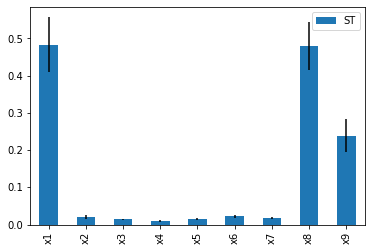

In [28]:
from SALib.plotting.bar import plot as barplot
import matplotlib.pyplot as plot

Si_df = Si.to_df()
img = barplot(Si_df[0])
plot.show()
fig = img.get_figure()
fig.savefig("Image/SensitivityAnalysis.png", dpi=300, bbox_inches='tight', facecolor='white')